# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [541]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
analyzer = SentimentIntensityAnalyzer()
from nltk.tokenize import word_tokenize
import json
import requests
from pathlib import Path
%matplotlib inline

In [542]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API")

In [543]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [544]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q='bitcoin',language='en')

In [545]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q='ethereum',language='en')

In [546]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
# Create a function to gather the information from headlines
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            url = article["url"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language,
                "url": url
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)
    

In [547]:
# Added a url column for potential future use to scrape the entirety of the the article
bitcoin_df = create_df(bitcoin_headlines['articles'],'en')
bitcoin_df.head()

,title,description,text,date,language,url
0,Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03,en,https://twocents.lifehacker.com/is-the-new-vis...
1,Bitcoin passes $20k and reaches all-time high,After reaching a previous all-time high on Nov...,After reaching a previous all-time high on Nov...,2020-12-16,en,http://techcrunch.com/2020/12/16/bitcoin-passe...
2,"Bitcoin Blows Past $20,000 Milestone",It’s been almost three years to the day since ...,Its been almost three years to the day since t...,2020-12-16,en,https://gizmodo.com/bitcoin-blows-past-20-000-...
3,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...","In November 2017, after an absolutely massive,...",2020-11-20,en,https://mashable.com/article/bitcoin-20000/
4,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,en,https://www.engadget.com/jd-com-supports-china...


In [548]:
# Initialize dictionary to hold the compound, negative, neutral and positive scores for the articles
text_sent = {'Compound':[],
                 'Negative':[],
                 'Neutral':[],
                 'Positive':[]}
# Get sentiment from articles
for index, row in bitcoin_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["Compound"].append(text_sentiment["compound"])
        text_sent["Negative"].append(text_sentiment["neg"])
        text_sent["Neutral"].append(text_sentiment["neu"])
        text_sent["Positive"].append(text_sentiment["pos"])
        #text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass
# Add the newly created scores to the previously created bitcoin dataframe
text_sent_df = pd.DataFrame(text_sent)
bitcoin_sentiment = text_sent_df.join(bitcoin_df)
bitcoin_sentiment.head()

,Compound,Negative,Neutral,Positive,title,description,text,date,language,url
0,0.6369,0.0,0.838,0.162,Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03,en,https://twocents.lifehacker.com/is-the-new-vis...
1,0.6486,0.0,0.826,0.174,Bitcoin passes $20k and reaches all-time high,After reaching a previous all-time high on Nov...,After reaching a previous all-time high on Nov...,2020-12-16,en,http://techcrunch.com/2020/12/16/bitcoin-passe...
2,0.4019,0.0,0.928,0.072,"Bitcoin Blows Past $20,000 Milestone",It’s been almost three years to the day since ...,Its been almost three years to the day since t...,2020-12-16,en,https://gizmodo.com/bitcoin-blows-past-20-000-...
3,0.2023,0.0,0.950,0.050,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...","In November 2017, after an absolutely massive,...",2020-11-20,en,https://mashable.com/article/bitcoin-20000/
4,0.0000,0.0,1.000,0.000,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,en,https://www.engadget.com/jd-com-supports-china...


In [549]:
# Rearrange and drop unnecessary columns
bitcoin_sentiment = bitcoin_sentiment.drop(columns=['title','description','date','language'])
bitcoin_sentiment.head()

,Compound,Negative,Neutral,Positive,text,url
0,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...
1,0.6486,0.0,0.826,0.174,After reaching a previous all-time high on Nov...,http://techcrunch.com/2020/12/16/bitcoin-passe...
2,0.4019,0.0,0.928,0.072,Its been almost three years to the day since t...,https://gizmodo.com/bitcoin-blows-past-20-000-...
3,0.2023,0.0,0.950,0.050,"In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/
4,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...",https://www.engadget.com/jd-com-supports-china...


In [550]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_df = create_df(ethereum_headlines['articles'],'en')
ethereum_df.head()

,title,description,text,date,language,url
0,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,https://in.reuters.com/article/us-crypto-curre...
1,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,https://www.reuters.com/article/us-crypto-curr...
2,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,en,https://in.reuters.com/article/us-crypto-curre...
3,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,FILE PHOTO: Representations of virtual currenc...,2020-12-16,en,https://www.reuters.com/article/crypto-currenc...
4,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,FILE PHOTO: A representation of virtual curren...,2020-12-16,en,https://in.reuters.com/article/crypto-currency...


In [551]:
# Initialize dictionary to hold the compound, negative, neutral and positive scores for the articles
text_sent = {'Compound':[],
                 'Negative':[],
                 'Neutral':[],
                 'Positive':[]}
# Get sentiment from articles
for index, row in ethereum_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["Compound"].append(text_sentiment["compound"])
        text_sent["Negative"].append(text_sentiment["neg"])
        text_sent["Neutral"].append(text_sentiment["neu"])
        text_sent["Positive"].append(text_sentiment["pos"])
        #text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass
# Add the newly created scores to the previously created bitcoin dataframe
text_sent_df = pd.DataFrame(text_sent)
ethereum_sentiment = text_sent_df.join(ethereum_df)
ethereum_sentiment.head()

,Compound,Negative,Neutral,Positive,title,description,text,date,language,url
0,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,https://in.reuters.com/article/us-crypto-curre...
1,0.0000,0.0,1.000,0.000,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,en,https://www.reuters.com/article/us-crypto-curr...
2,0.4215,0.0,0.912,0.088,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,en,https://in.reuters.com/article/us-crypto-curre...
3,0.0000,0.0,1.000,0.000,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,FILE PHOTO: Representations of virtual currenc...,2020-12-16,en,https://www.reuters.com/article/crypto-currenc...
4,0.0000,0.0,1.000,0.000,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,FILE PHOTO: A representation of virtual curren...,2020-12-16,en,https://in.reuters.com/article/crypto-currency...


In [552]:
# Rearrange and drop unnecessary columns
ethereum_sentiment = ethereum_sentiment.drop(columns=['title','description','date','language'])
ethereum_sentiment.head()

,Compound,Negative,Neutral,Positive,text,url
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,https://in.reuters.com/article/us-crypto-curre...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,https://www.reuters.com/article/us-crypto-curr...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,https://in.reuters.com/article/us-crypto-curre...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,https://www.reuters.com/article/crypto-currenc...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,https://in.reuters.com/article/crypto-currency...


In [553]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.238942,0.009368,0.920579,0.070053
std,0.357613,0.028447,0.083627,0.079392
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.202300,0.000000,0.950000,0.050000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [554]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.073660,0.016800,0.937800,0.045400
std,0.279728,0.052501,0.106015,0.077994
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.177900,0.000000,1.000000,0.068250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a slightly higher mean positive score with 0.07 compared to the 0.04 score for ethereum.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with 0.877 when compared to Bitcoin, which maxed out at only 0.801.

Q. Which coin had the highest positive score?

A: Ethereum also had the highest positive score with a 0.318.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [555]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [556]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
# vew list of stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [557]:
# Set list of stop words and add new list of custome stop words
sw = set(stopwords.words('english'))
sw_addon = ['America','President','Federal Reserve','Joe Biden','Donald Trump','Jerome Powell','European Union','ECB','reuters','file','photo']
sw = sw.union(sw_addon)
print(sw)

{'over', "you'd", 'other', 'who', 'their', 'by', 'during', 'to', 'where', 'below', 'until', 'again', 'there', 'if', 'few', 'so', 'couldn', 'Federal Reserve', 'into', 'were', 'more', 'it', 'which', 'does', 'both', 'than', "you've", 'an', 'hasn', 'they', 'his', 'its', 'just', "isn't", 's', 'or', 'of', 'in', 'that', 'am', 'after', 'file', 'on', "should've", 'at', 'doing', 'we', "hasn't", 'all', "haven't", 'Donald Trump', 'further', 'America', 'isn', "shouldn't", "that'll", 'don', 'them', 'ain', 'can', 'he', 'here', 'those', 'itself', 'being', 'was', 'theirs', 'off', 'o', 'll', 'ECB', 'will', 'Jerome Powell', 'your', 'only', 'ourselves', 'when', 'him', 'ma', 'with', 'while', 'once', 'and', 'hadn', 'yourselves', 'herself', "weren't", 'through', "doesn't", 'Joe Biden', 'no', 'i', 'but', 'then', "couldn't", "shan't", 'not', 'nor', "aren't", "hadn't", "she's", 'too', 'a', 'are', 're', 'me', "you're", "wasn't", 'photo', "don't", 'against', 'as', 'how', 'own', 'been', "it's", 'didn', 've', 'such

In [558]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    words = []
    # Remove the puntcuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    tokens = [word.lower() for word in words if word.lower() not in sw]
    return tokens
    

In [559]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_sentiment['Tokens'] = bitcoin_sentiment['text'].apply(tokenizer)
bitcoin_sentiment

,Compound,Negative,Neutral,Positive,text,url,Tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,http://techcrunch.com/2020/12/16/bitcoin-passe...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,https://gizmodo.com/bitcoin-blows-past-20-000-...,"[almost, three, years, day, since, price, bitc..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,"[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...",https://www.engadget.com/jd-com-supports-china...,"[unlike, conventional, cryptocurrencies, centr..."
5,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,https://gizmodo.com/bitcoin-could-hit-20k-agai...,"[youve, watching, crypto, markets, past, weeks..."
6,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,http://techcrunch.com/2020/12/09/with-investor...,"[six, years, launch, mexicobased, crypotcurren..."
7,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...,http://techcrunch.com/2020/12/03/as-crypto-com...,"[decentralized, exchange, protocols, allow, cr..."
8,0.7650,0.000,0.829,0.171,None,https://www.cnn.com/2020/11/20/investing/bitco...,[none]
9,-0.5859,0.103,0.897,0.000,4. U.S. markets ended November with large gain...,https://www.nytimes.com/2020/11/30/briefing/on...,"[us, markets, ended, november, large, gains, e..."


In [560]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_sentiment['Tokens'] = ethereum_sentiment['text'].apply(tokenizer)
ethereum_sentiment

,Compound,Negative,Neutral,Positive,text,url,Tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,https://in.reuters.com/article/us-crypto-curre...,"[representation, ethereum, virtual, currency, ..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,https://www.reuters.com/article/us-crypto-curr...,"[representation, ethereum, virtual, currency, ..."
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,https://in.reuters.com/article/us-crypto-curre...,"[london, digital, currencies, ethereum, xrp, s..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,https://www.reuters.com/article/crypto-currenc...,"[representations, virtual, currency, bitcoin, ..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,https://in.reuters.com/article/crypto-currency...,"[representation, virtual, currency, bitcoin, s..."
5,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,https://in.reuters.com/article/crypto-currency...,"[representations, virtual, currency, bitcoin, ..."
6,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,https://uk.reuters.com/article/us-crypto-curre...,"[new, york, institutional, investors, pumped, ..."
7,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,https://www.reuters.com/article/us-crypto-curr...,"[new, york, institutional, investors, pumped, ..."
8,0.8779,0.000,0.682,0.318,"PayPal has launched the Generosity Network, a ...",https://mashable.com/article/paypal-generosity...,"[paypal, launched, generosity, network, platfo..."
9,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,https://www.reuters.com/article/crypto-currenc...,"[stafffile, representation, virtual, currency,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [561]:
from collections import Counter
from nltk import ngrams

In [569]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
# Concatenate the Tokens
btc_ngrams = Counter(ngrams(tokenizer(bitcoin_sentiment['text'].str.cat()),n=2))
print(dict(btc_ngrams))

{('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'rewards'): 1, ('rewards', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pays'): 1, ('pays', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'charsafter'): 1, ('charsafter', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'alltime'): 1, ('alltime', 'high'): 2, ('high', 'november'): 1, ('november', 'th'): 1, ('th', 'december'): 1, ('december', 'st'): 1, ('st', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'pricebitcoins'): 1, ('pricebitcoins', 'value'): 1, ('value', 'rapidly'): 1, ('rapidly', 'charsits'): 1

In [571]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngrams = Counter(ngrams(tokenizer(ethereum_sentiment['text'].str.cat()),n=2))
print(dict(eth_ngrams))

{('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 12, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 6, ('ruvicillustrationlondon', 'charsfile'): 1, ('charsfile', 'representation'): 2, ('ruvicillustrationlondon', 'charslondon'): 1, ('charslondon', 'digital'): 1, ('digital', 'currencies'): 1, ('currencies', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'monday'): 1, ('monday', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'alltime'): 1, ('alltime', 'highfile'): 1, ('highfile', 'representation'): 1, ('currency', 'charsfile'): 1, ('charsfile', 'representations'): 2, ('representations', 'virtual'): 3, ('currency', '

In [491]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [572]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
top_10_bitcoin = dict(token_count(btc_ngrams))
pd.DataFrame(list(top_10_bitcoin.items()), columns=['bigram', 'count'])


,bigram,count
0,"(illustration, taken)",3
1,"(alltime, high)",2
2,"(chars, posters)",2
3,"(charsby, stafffile)",2
4,"(virtual, currency)",2
5,"(currency, bitcoin)",2
6,"(bitcoin, seen)",2
7,"(reutersdado, ruvicfile)",2
8,"(visahas, partnered)",1
9,"(partnered, cryptocurrency)",1


In [573]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
top_10_ethereum = dict(token_count(eth_ngrams))
pd.DataFrame(list(top_10_ethereum.items()), columns=['bigram', 'count'])

,bigram,count
0,"(virtual, currency)",12
1,"(currency, bitcoin)",9
2,"(illustration, taken)",9
3,"(bitcoin, seen)",8
4,"(reutersdado, ruvicillustrationlondon)",6
5,"(representation, virtual)",6
6,"(taken, november)",6
7,"(november, reutersdado)",6
8,"(seen, illustration)",5
9,"(charsby, stafffile)",4


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [574]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

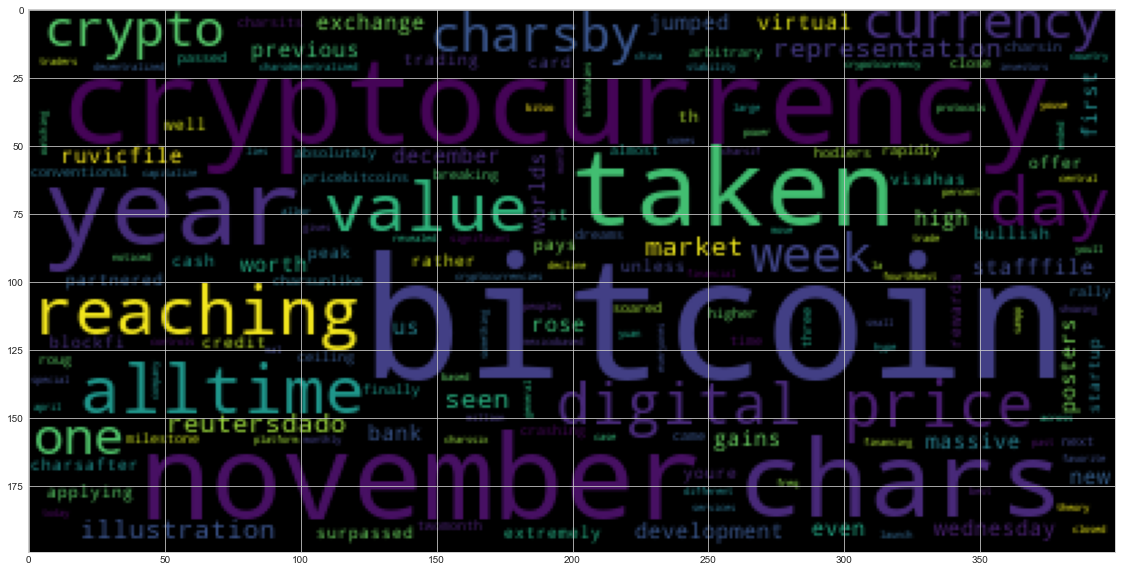

In [581]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(tokenizer(bitcoin_sentiment['text'].str.cat())))
plt.imshow(wc)

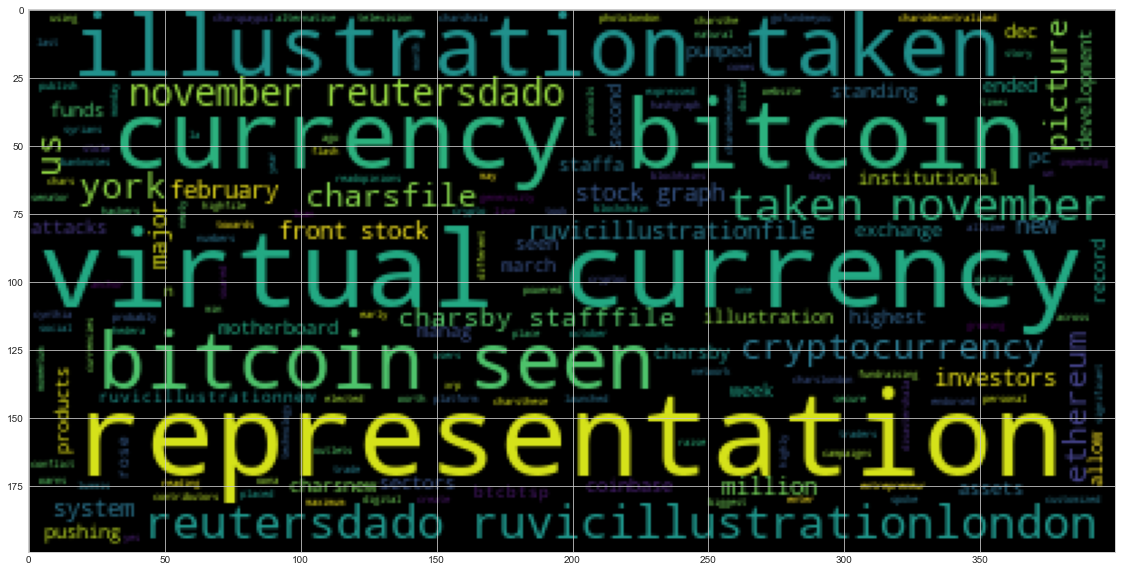

In [582]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(tokenizer(ethereum_sentiment['text'].str.cat())))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [583]:
import spacy
from spacy import displacy

In [584]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [585]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [586]:
# NER for bitcoin
for index in bitcoin_sentiment['text']:
    if index is None:
        pass
    else:
        doc = nlp(index)
        displacy.render(doc, style='ent')

/Users/kevinwalsh/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [587]:
# NER for Ethereum
for index in ethereum_sentiment['text']:
    if index is None:
        pass
    else:
        doc = nlp(index)
        displacy.render(doc, style='ent')

## Bitcoin NER

In [596]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_concatenate = bitcoin_sentiment['text'].str.cat()

In [598]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_concatenate)

# Add a title to the document
# YOUR CODE HERE!

print('BITCOIN NER CONCATENATED')
displacy.render(doc, style='ent')

BITCOIN NER CONCATENATED


In [599]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['Visa', 'first', 'Bitcoin', 'November 30th, 2020', 'December 1st', '2020', 'bitcoin', 'above $20,000', 'almost three years', 'the day', 'Bitcoin', '20,000', 'Wednesday', 'November 2017', 'two-month', 'Bitcoin', '10,000', 'first', 'the next 20 days', '19,665', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Mexico', '$62 million', 'chars]4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Grayson Blackmon /', 'One', 'the year', 'the day', 'Twitter', 'Williams', 'Arya Stark', 'Lady Catelyn', 'Eddard', 'acolyte', 'the Faceless Men', 'Monday', 'chars]8', '7', 'Bitcoin', 'above $18,000', 'Tuesday', 'evening', 'December 2017', 'this week', 'more than $18,000', 'chars]6', '6', 'one', 'above $20,000', 'Wednesday', 'a year', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reu', 'Reuters', 'Bitcoin', 'U.S.', 'January 6, 2020', 'REUTERS/', 'Dado Ruvic/File Photo', 'LONDON', 'Reuters', 'Bitco

In [600]:
# List of all organizations
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Bitcoin', 'bitcoin', 'Bitcoin', 'Bitcoin', 'bitcoin', 'hype', 'Mexico', 'U.S.', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'U.S.', 'LONDON', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'Bitcoin']


---

## Ethereum NER

In [601]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!
ethereum_concatenate = ethereum_sentiment['text'].str.cat()

In [602]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_concatenate)

# Add a title to the document
# YOUR CODE HERE!

print('Ethereum NER CONCATENATED')
displacy.render(doc, style='ent')


Ethereum NER CONCATENATED


In [603]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['February 3, 2018', 'REUTERS/', 'Reuters', 'February 3, 2018', 'REUTERS/', 'Reuters', 'Reuters', 'XRP', 'Monday', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'the Generosity Network', '20,000', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'chars]The New York Times', 'Coinbase', '15, 2020', '6 min', 'A few days ago', 'US', 'Cynthia Lummis', 'Bitcoin', 'early February this year', 'last month', 'October', '$24 million', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 1

In [608]:
# List all National or Political Religous Groups
print([ent.text for ent in doc.ents if ent.label_ == 'NORP'])

['Syrians']
